In [90]:
import os
os.chdir(os.getcwd())

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
%matplotlib inline

In [92]:
orig_df = pd.read_csv("titanic_data_preprocessed.csv")
orig_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [93]:
orig_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
orig_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [95]:
df = orig_df[['Pclass','Age','SibSp', 'Parch','Fare']]
df.tail()

,Pclass,Age,SibSp,Parch,Fare
886,2,27.000000,0,0,13.00
887,1,19.000000,0,0,30.00
888,3,29.699118,1,2,23.45
889,1,26.000000,0,0,30.00
890,3,32.000000,0,0,7.75


In [96]:
df.loc[891] = [3,63,5,6,37]

/Users/pantchanit/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [97]:
df.tail()

,Pclass,Age,SibSp,Parch,Fare
887,1,19.000000,0,0,30.00
888,3,29.699118,1,2,23.45
889,1,26.000000,0,0,30.00
890,3,32.000000,0,0,7.75
891,3,63.000000,5,6,37.00


In [98]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.826596,-0.593507,0.424571,-0.469141,-0.502833
1,-1.567312,0.633943,0.424571,-0.469141,0.787174
2,0.826596,-0.286644,-0.474995,-0.469141,-0.489234
3,-1.567312,0.403797,0.424571,-0.469141,0.420856
4,0.826596,0.403797,-0.474995,-0.469141,-0.486716


In [99]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [100]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [101]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

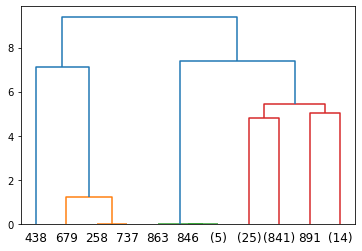

In [102]:
plot_dendrogram(model, truncate_mode='level', p=3)

In [103]:
# Choose the distance threshold from dendrogram
dist_threshold_val = 4
nclusters_val = None

In [104]:
model=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model=model.fit(df_normalized)
model

AgglomerativeClustering(distance_threshold=4, linkage='average',
                        n_clusters=None)

In [105]:
labels = model.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 3, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 6, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,

In [106]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([2, 3, 1, 0, 6, 4, 7, 5])

In [107]:
cluster_predictions = model.fit_predict(df_normalized)
df['cluster_id'] = cluster_predictions
df.tail(10)

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_4368/2642030878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_id'] = cluster_predictions


,Pclass,Age,SibSp,Parch,Fare,cluster_id
882,3,22.000000,0,0,10.5167,2
883,2,28.000000,0,0,10.5000,2
884,3,25.000000,0,0,7.0500,2
885,3,39.000000,0,5,29.1250,1
886,2,27.000000,0,0,13.0000,2
887,1,19.000000,0,0,30.0000,2
888,3,29.699118,1,2,23.4500,2
889,1,26.000000,0,0,30.0000,2
890,3,32.000000,0,0,7.7500,2
891,3,63.000000,5,6,37.0000,5


In [108]:
print(metrics.silhouette_score(df,labels))

-0.1325268056243054


In [109]:
print(metrics.davies_bouldin_score(df,model.labels_))

1.4222743965712776


In [110]:
df.cluster_id.value_counts()

2    806
3     35
0     25
1     14
6      7
4      3
7      1
5      1
Name: cluster_id, dtype: int64

In [111]:
df[df.cluster_id==0].mean()

Pclass          1.000000
Age            25.692729
SibSp           0.840000
Parch           1.360000
Fare          198.268000
cluster_id      0.000000
dtype: float64

In [112]:
df[df.cluster_id==1].mean()

Pclass         2.857143
Age           37.071429
SibSp          0.785714
Parch          4.142857
Fare          29.734521
cluster_id     1.000000
dtype: float64

In [113]:
df[df.cluster_id==5].mean()

Pclass         3.0
Age           63.0
SibSp          5.0
Parch          6.0
Fare          37.0
cluster_id     5.0
dtype: float64

In [114]:
df[df.cluster_id==6].mean()

Pclass         3.000000
Age           29.699118
SibSp          8.000000
Parch          2.000000
Fare          69.550000
cluster_id     6.000000
dtype: float64